In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import warnings
import scipy.stats as ss
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.utils import resample

In [332]:
df = pd.read_csv("group_9.csv")

In [333]:
summary = pd.DataFrame({
    'Tipo': df.dtypes,
    'Nº Nulos': df.isnull().sum(),
    'Nº Únicos': df.nunique(),
    'Exemplo Valor': df.iloc[0]
})
summary

Tipo  Nº Nulos  Nº Únicos Exemplo Valor
duration_1                     float64         0          2           1.0
duration_2                     float64         0          2           0.0
duration_3                     float64         0          2           0.0
duration_4                     float64         0          2           0.0
duration_5                     float64         0          2           0.0
loudness_level                 float64         0          5           3.0
popularity_level               float64         0          5           3.0
tempo_class                    float64         0          4           1.0
time_signature                 float64         0          4      0.221824
key_mode                       float64         0         24       -0.9491
artist_song_count              float64         0         51      0.386456
album_freq                     float64         0         77     -0.301858
movement_index                 float64         0        823      -0.79981
intensity_level                float64         0       2213      1.244886
verbal_density                 float64         0        909     -0.170736
purity_score                   float64         0       1732     -0.946813
positivity_index               float64         0       1038      -0.96068
activity_rate                  float64         0       2409      -0.12815
loudness_intensity             float64         0       2567       1.26904
happy_dance                    float64         0       2557      -0.97851
acoustics_instrumental         float64         0       1976     -0.306291
artists_avg_popularity         float64         0        345     -0.013785
tempo_vs_genre                 float64         0       2494     -0.359053
energy_rank_pct                float64         0        621      1.577655
loud_energy_ratio              float64         0       2571     -0.009441
mood_pca                       float64         0       2584     -0.157539
mood_cluster                   float64         0         10      1.228232
acoustic_valence_mood_cluster  float64         0         11     -1.581244
explicit                       float64         0          2           0.0
signal_strength                float64         0        621         0.972
mode_indicator                 float64         0          2           0.0
focus_factor                    object         0       1508        0.0736
ambient_level                  float64         0        861        0.0787
key_sin                        float64         0         11      0.866025
key_cos                        float64         0         11           0.5
duration_log                   float64         0       2436      2.101556
duration_log_z                 float64         0       2436      1.993773
time_signature_class_boolean   float64         0          2           1.0
loudness_yeo                   float64         0       2213       2.01185
is_instrumental                float64         0          2           0.0
is_dance_hit                   float64         0          2           0.0
temp_zscore                    float64         0       2409     -0.128149
resonance_factor               float64         0       3000     -1.114081
timbre_index                   float64         0       3000      0.183527
echo_constant                    int64         0          1             1
distorted_movement             float64         0        730     -0.292728
signal_power                   float64         0        621         0.972
target_class                    object         0          3       class_7
target_regression              float64         0         94      0.796292

UNIVARIATE ANALYSIS 
    (Distribution of individual numerical features)

In [334]:
# setup inicial
numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power'
]
numerical_target = 'target_regression'
df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True).astype(float)

In [335]:
num_desc = df[numeric_columns].describe().T
num_desc["skew"] = df[numeric_columns].skew()
num_desc["kurtosis"] = df[numeric_columns].kurtosis()
display(num_desc)

count      mean       std       min       25%  \
time_signature                 3000.0  0.063872  0.838877 -6.712656  0.221824   
key_mode                       3000.0  0.029570  1.005989 -1.511882 -0.920961   
artist_song_count              3000.0 -0.146857  0.823009 -0.575306 -0.551262   
album_freq                     3000.0  0.417375  1.596000 -0.514901 -0.472292   
movement_index                 3000.0 -0.135341  1.319168 -2.903623 -1.175799   
intensity_level                3000.0  0.477341  0.525001 -3.120303  0.241274   
verbal_density                 3000.0  0.161741  0.779793 -0.575532 -0.340977   
purity_score                   3000.0 -0.631092  0.488400 -0.947029 -0.945871   
positivity_index               3000.0 -0.258656  1.062009 -1.760264 -1.208501   
activity_rate                  3000.0  0.115770  1.058417 -2.358774 -0.870874   
loudness_intensity             3000.0  0.007379  0.898763 -8.971340 -0.446733   
happy_dance                    3000.0 -0.114763  1.195238 -1.454267 -1.177658   
acoustics_instrumental         3000.0 -0.258779  0.355141 -0.306318 -0.306318   
artists_avg_popularity         3000.0 -0.258200  1.031136 -1.740774 -0.876641   
tempo_vs_genre                 3000.0 -0.000829  1.093653 -2.691121 -0.870520   
energy_rank_pct                3000.0  0.530980  0.798620 -1.637807 -0.071972   
loud_energy_ratio              3000.0 -0.009357  0.000136 -0.009601 -0.009442   
mood_pca                       3000.0  0.059385  0.867999 -2.691988 -0.633812   
mood_cluster                   3000.0 -0.145750  1.015092 -1.443801 -1.109797   
acoustic_valence_mood_cluster  3000.0 -0.337518  1.081000 -1.581244 -1.581244   
signal_strength                3000.0  0.776058  0.164865  0.088700  0.670000   
focus_factor                   3000.0  0.177387  0.312107  0.000000  0.000000   
ambient_level                  3000.0  0.200382  0.155700  0.015000  0.097600   
key_sin                        3000.0 -0.041466  0.671638 -1.000000 -0.500000   
key_cos                        3000.0  0.045981  0.738513 -1.000000 -0.866025   
duration_log                   3000.0  1.606321  0.274340  0.410718  1.444771   
duration_log_z                 3000.0  0.284389  0.946929 -3.842434 -0.273230   
loudness_yeo                   3000.0  0.510257  0.755598 -2.337628  0.055209   
temp_zscore                    3000.0  0.115769  1.058412 -2.358763 -0.870870   
resonance_factor               3000.0 -0.027381  1.005248 -3.453354 -0.716329   
timbre_index                   3000.0  0.505085  0.287864  0.000423  0.263251   
distorted_movement             3000.0 -0.002420  0.999781 -3.266071 -0.622619   
signal_power                   3000.0  0.776058  0.164865  0.088700  0.670000   

                                        50%       75%       max      skew  \
time_signature                 2.218242e-01  0.221824  2.533318 -4.879960   
key_mode                       1.764658e-01  1.020640  1.611562 -0.020314   
artist_song_count             -4.550858e-01 -0.214645  4.257551  3.447694   
album_freq                    -4.296837e-01  0.422488  7.282470  1.999196   
movement_index                -3.342500e-02  1.044124  2.254205 -0.270752   
intensity_level                5.662676e-01  0.819482  1.672577 -1.470914   
verbal_density                -1.064227e-01  0.343771  6.481912  2.263091   
purity_score                  -8.554555e-01 -0.513973  2.015192  2.335147   
positivity_index              -4.727532e-01  0.647744  1.963026  0.368025   
activity_rate                  9.494597e-02  0.928419  3.064775  0.240392   
loudness_intensity             1.521328e-01  0.584533  2.377592 -1.427660   
happy_dance                   -5.476619e-01  0.940643  3.201300  0.620307   
acoustics_instrumental        -3.063085e-01 -0.306102  4.649304  9.664274   
artists_avg_popularity        -4.838531e-01  0.563581  3.391653  0.563990   
tempo_vs_genre                -5.839814e-02  0.718125  3.318379  0.313830   
energy_rank_pct                5.849071e-01  

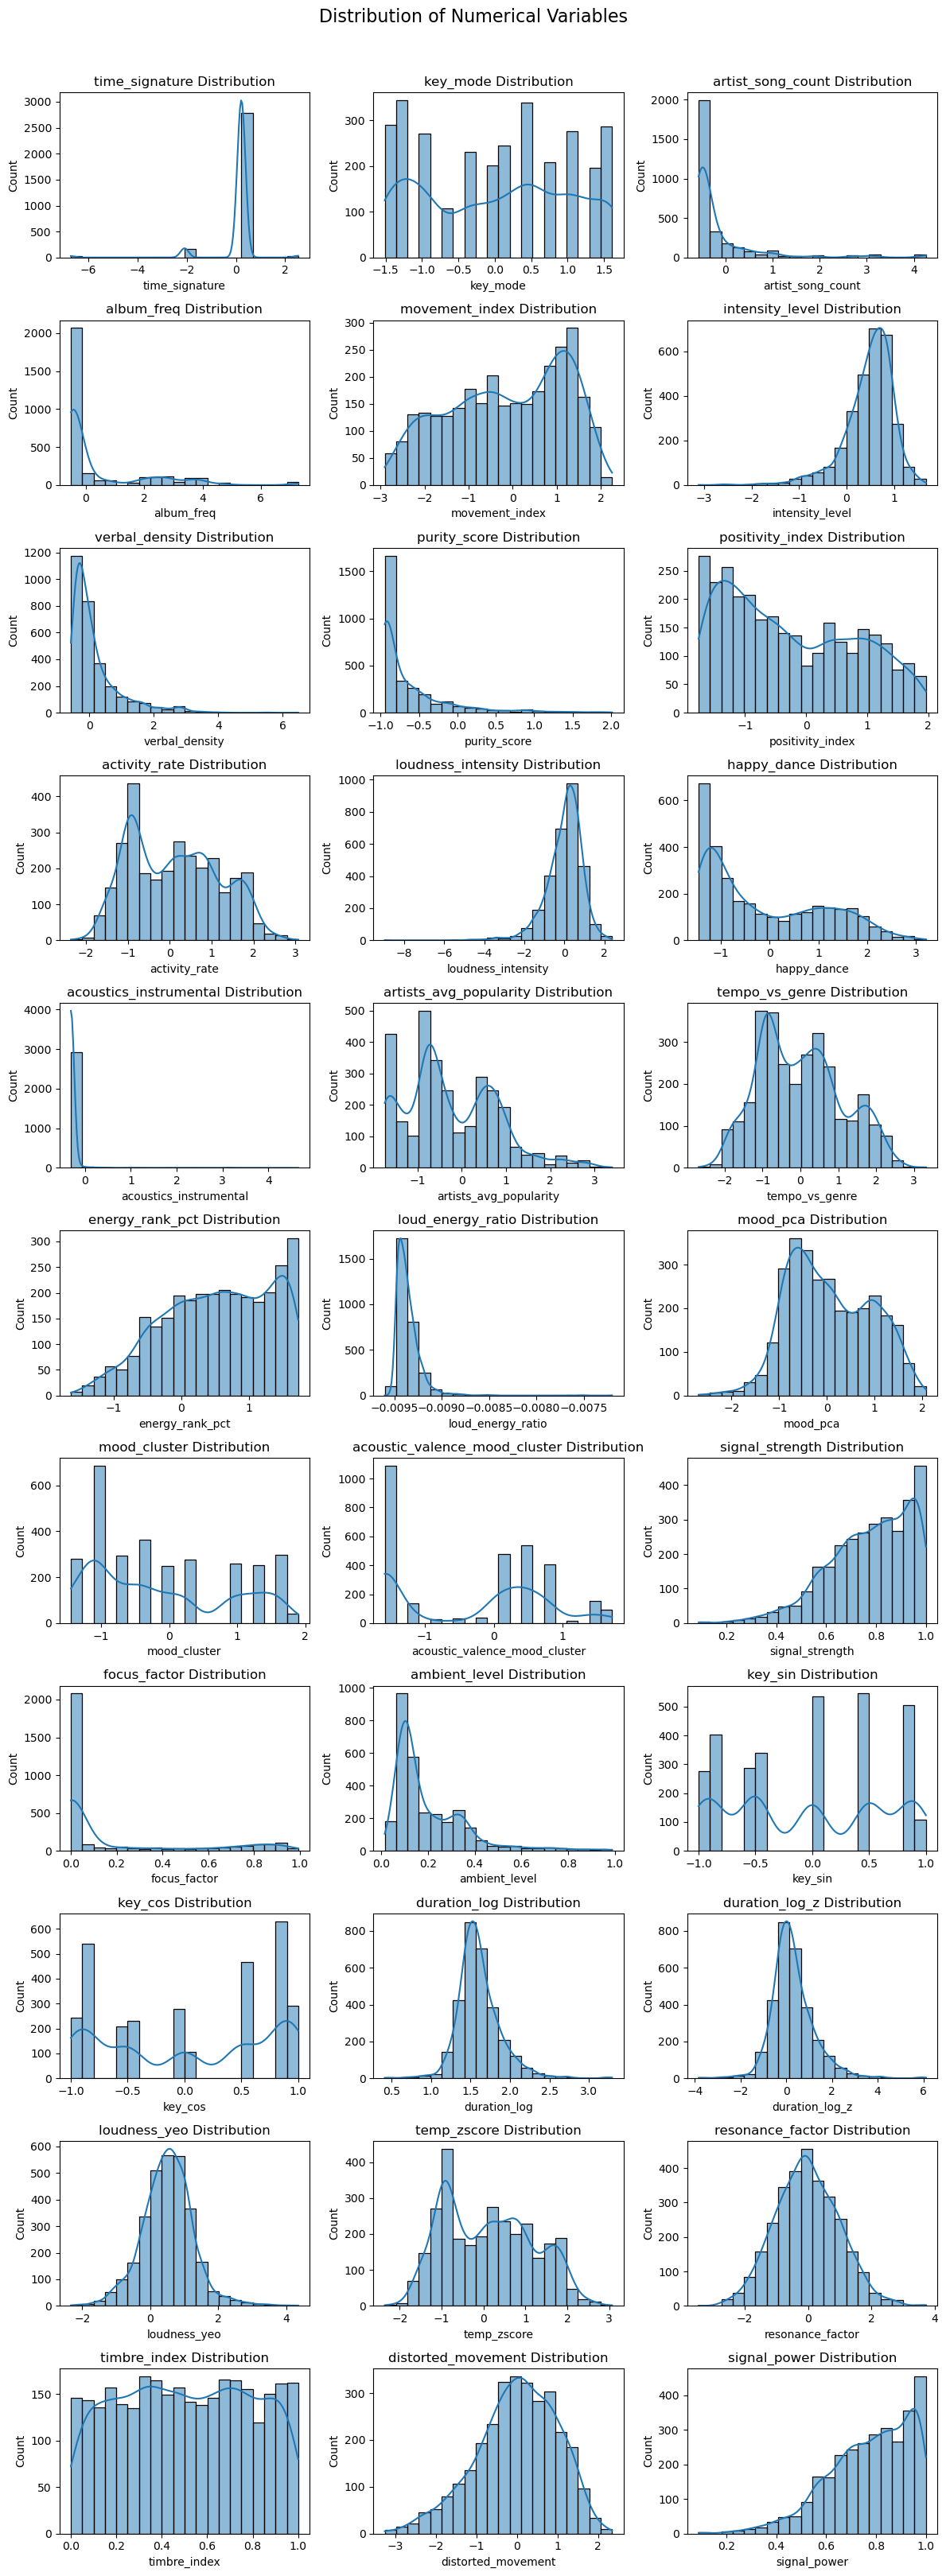

In [336]:

# Grid setup
n = len(numeric_columns)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(numeric_columns):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(numeric_columns), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()




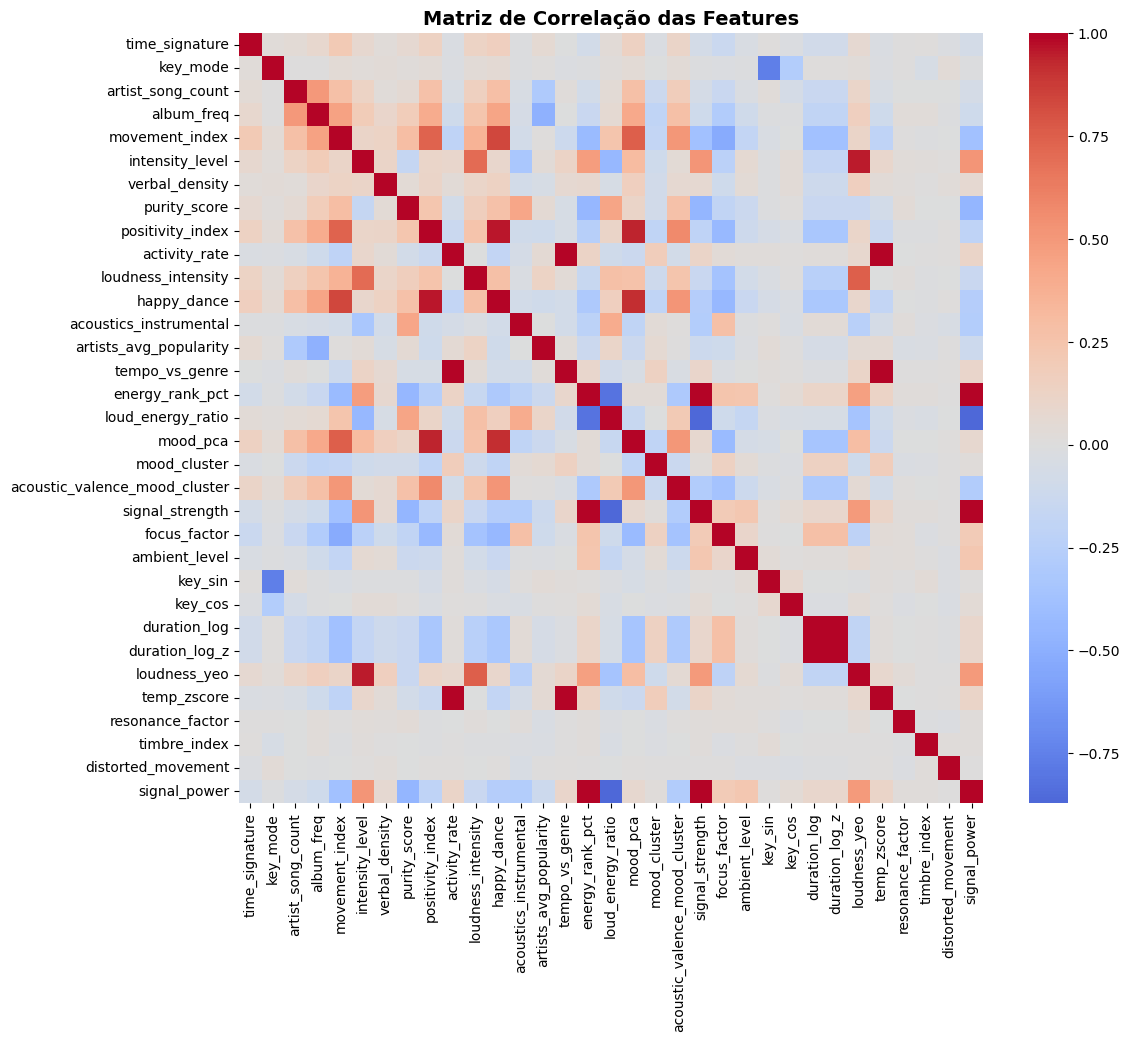

In [337]:
corr_matrix = df[numeric_columns].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Features", fontsize=14, fontweight='bold')
plt.show()

BIVARIATE ANALYSIS (Correlation between numerical features and the target variable)

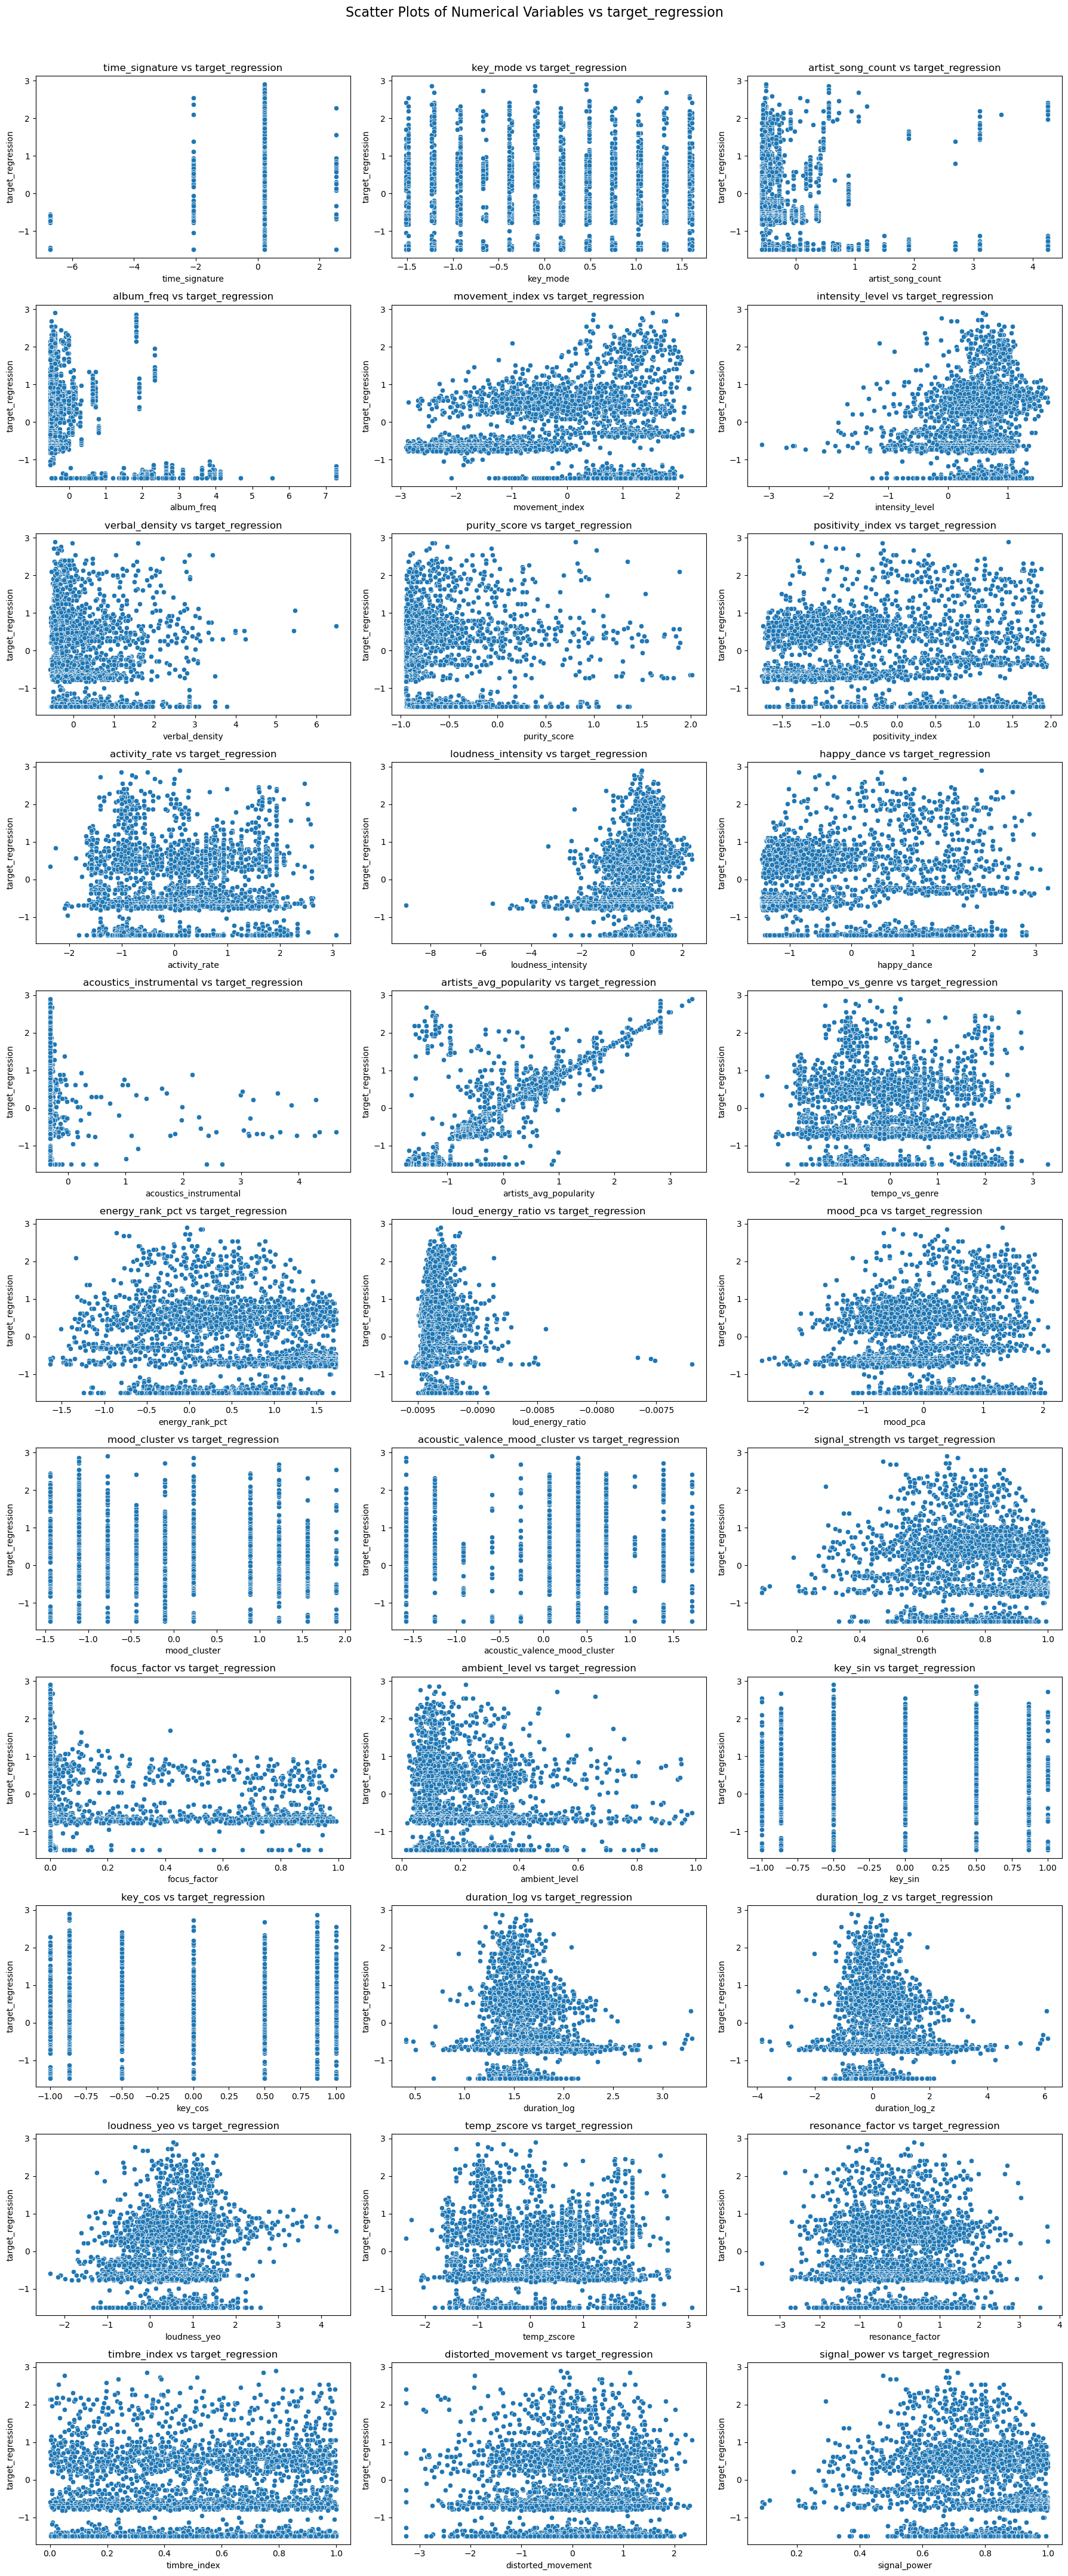

In [338]:
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Scatter Plots of Numerical Variables vs {numerical_target}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y=numerical_target, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {numerical_target}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(numerical_target)

# Hide extra subplots (if any)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

UNIVARIATE ANALYSIS 
    (Distribution of individual categorical features)

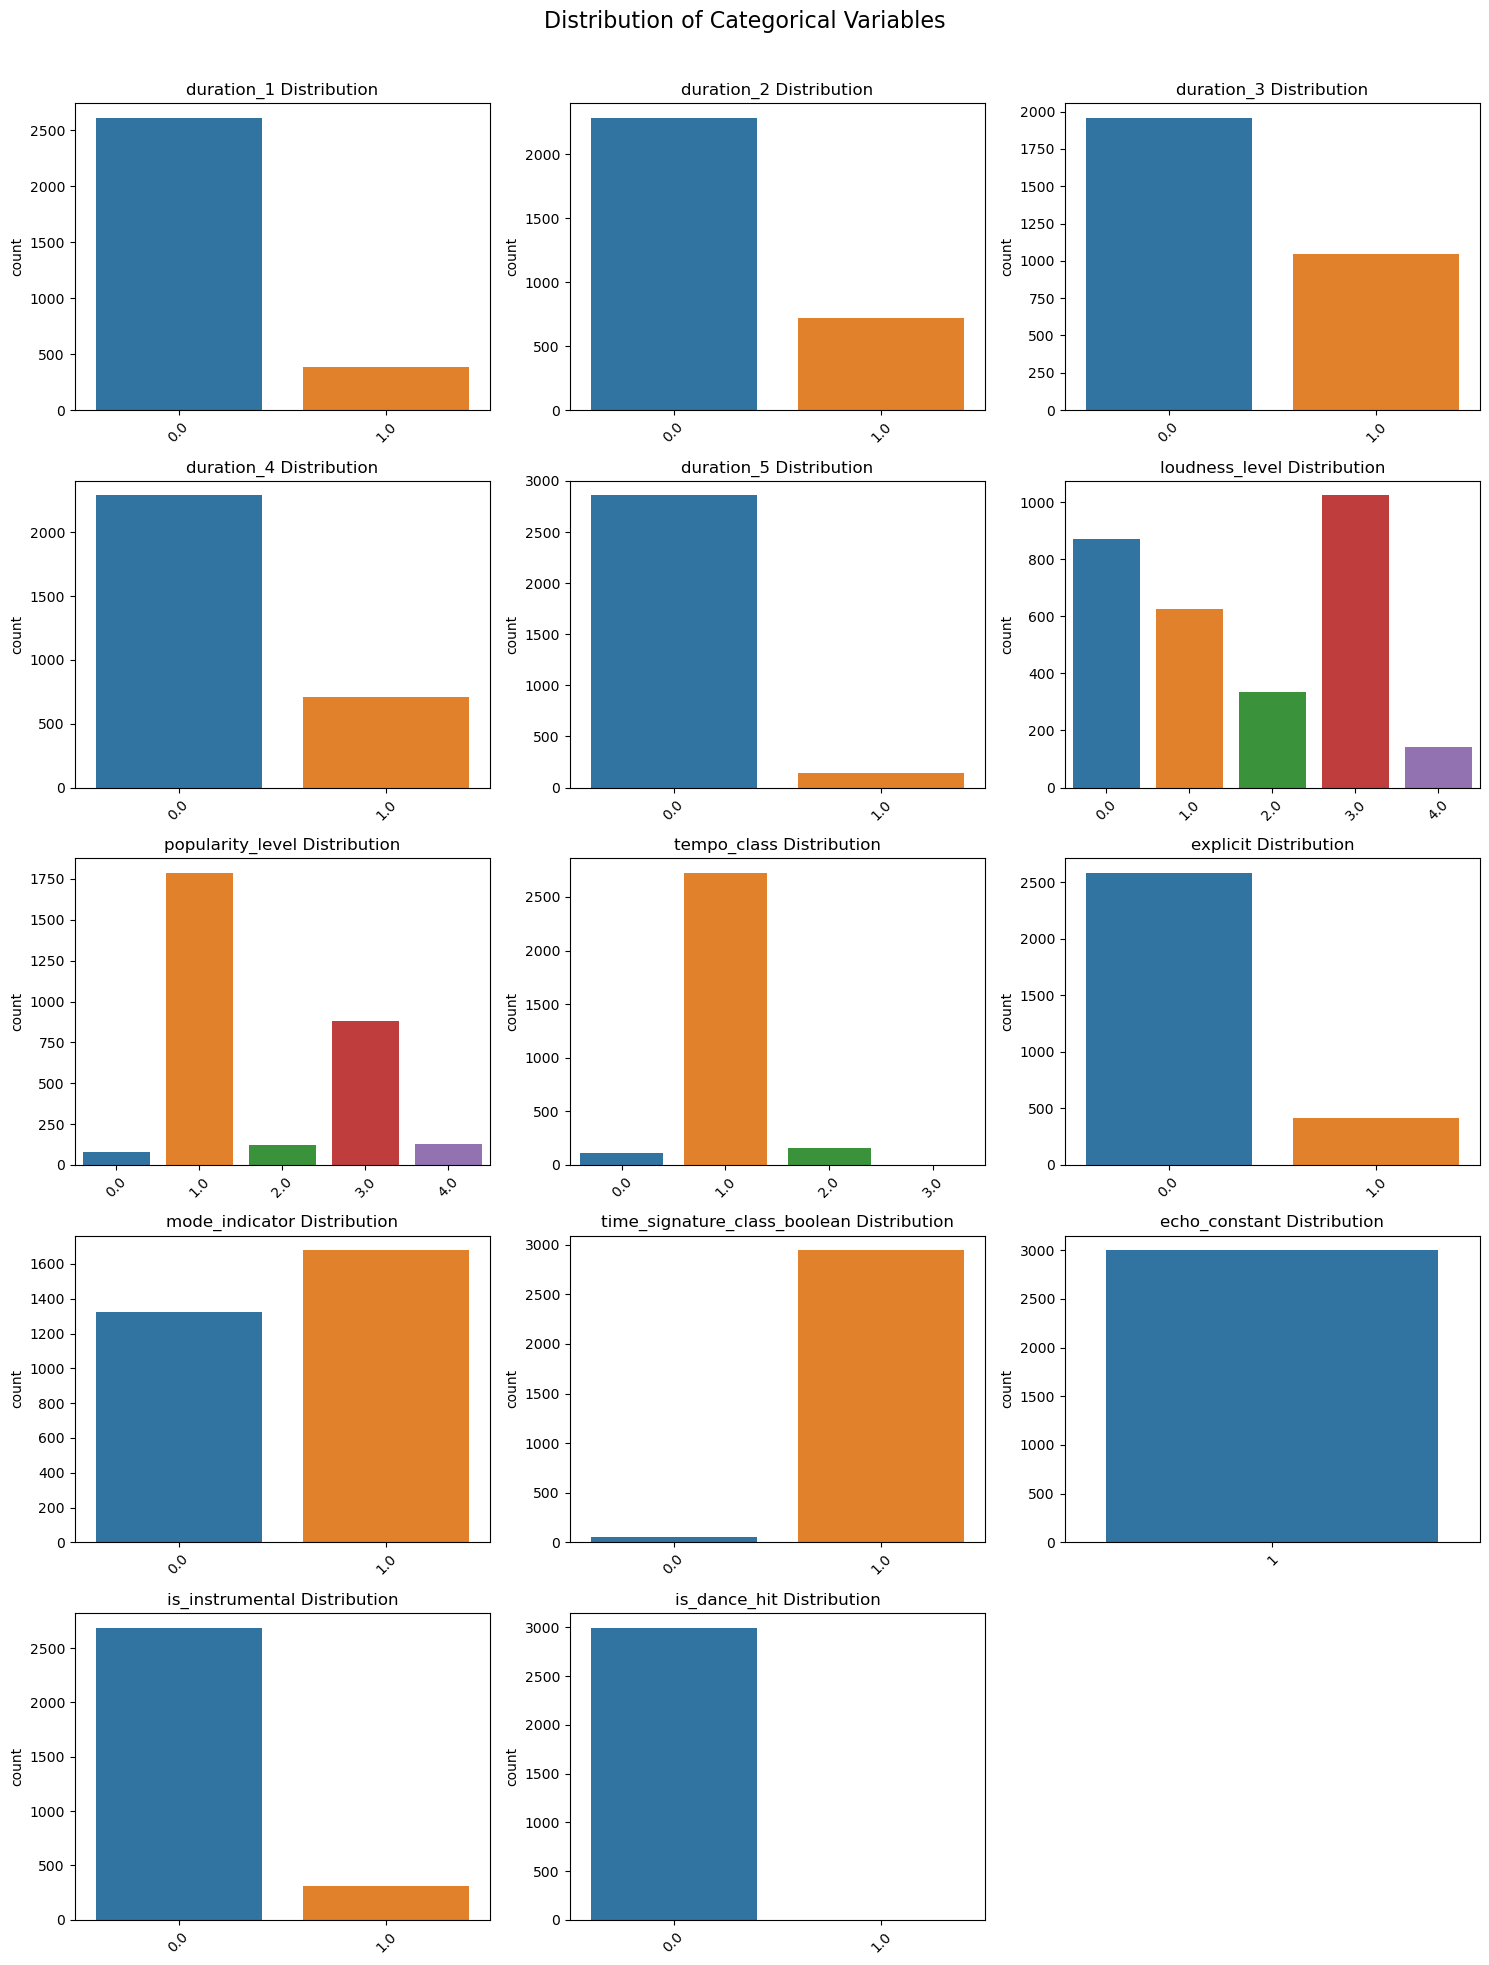

In [339]:
# Initial setup
#O target não é uma variável explicativa, é a variável a prever. separar 
categorical_columns = [
    'duration_1',
    'duration_2',
    'duration_3',
    'duration_4',
    'duration_5',
    'loudness_level',
    'popularity_level',
    'tempo_class',
    'explicit',
    'mode_indicator',
    'time_signature_class_boolean',
'echo_constant',
    'is_instrumental',
    'is_dance_hit'
]
categorica_target = 'target_class'

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()  # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel("")                        # Remove x labels for cleaner look if long names
    axes[idx].tick_params(axis='x', rotation=45)    # Rotate labels for readability

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [340]:
def cramers_v(x, y):
    confusion = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion)[0]
    n = confusion.sum().sum()
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

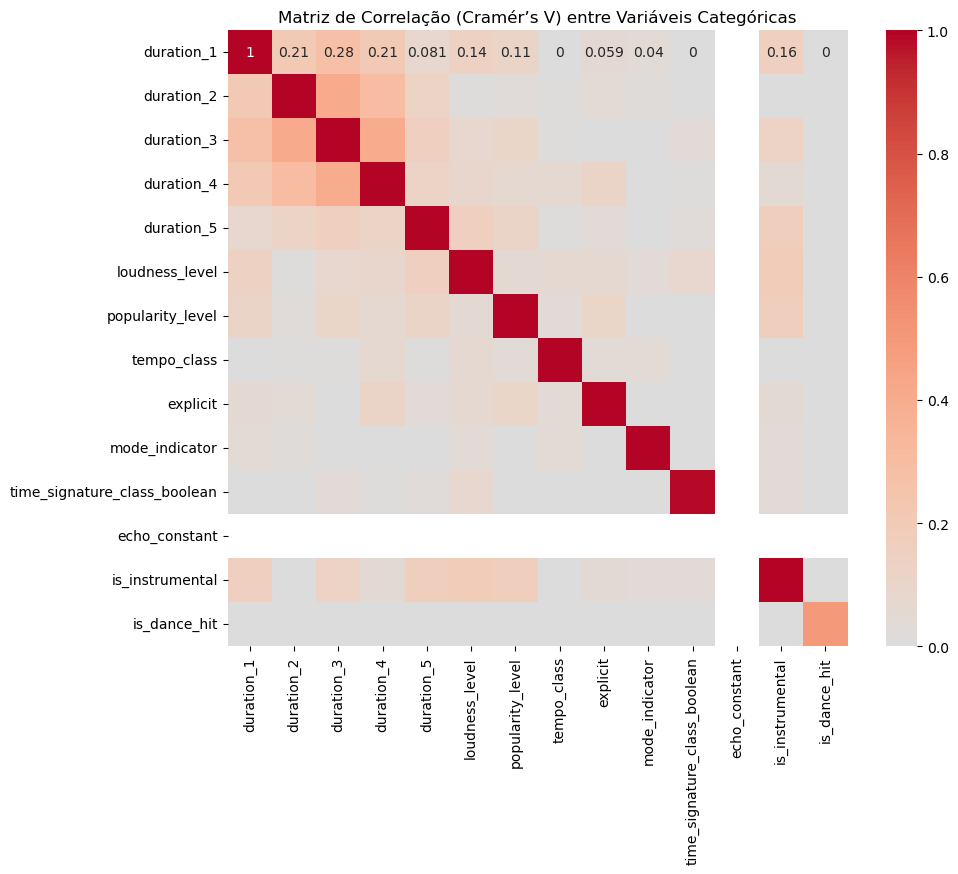

In [341]:
cramers = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

# Calcular Cramer's V para todos os pares
for c1 in categorical_columns:
    for c2 in categorical_columns:
        cramers.loc[c1, c2] = cramers_v(df[c1], df[c2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação (Cramér’s V) entre Variáveis Categóricas")
plt.show()

BIVARIATE ANALYSIS (Correlation between numerical features and the target variable)

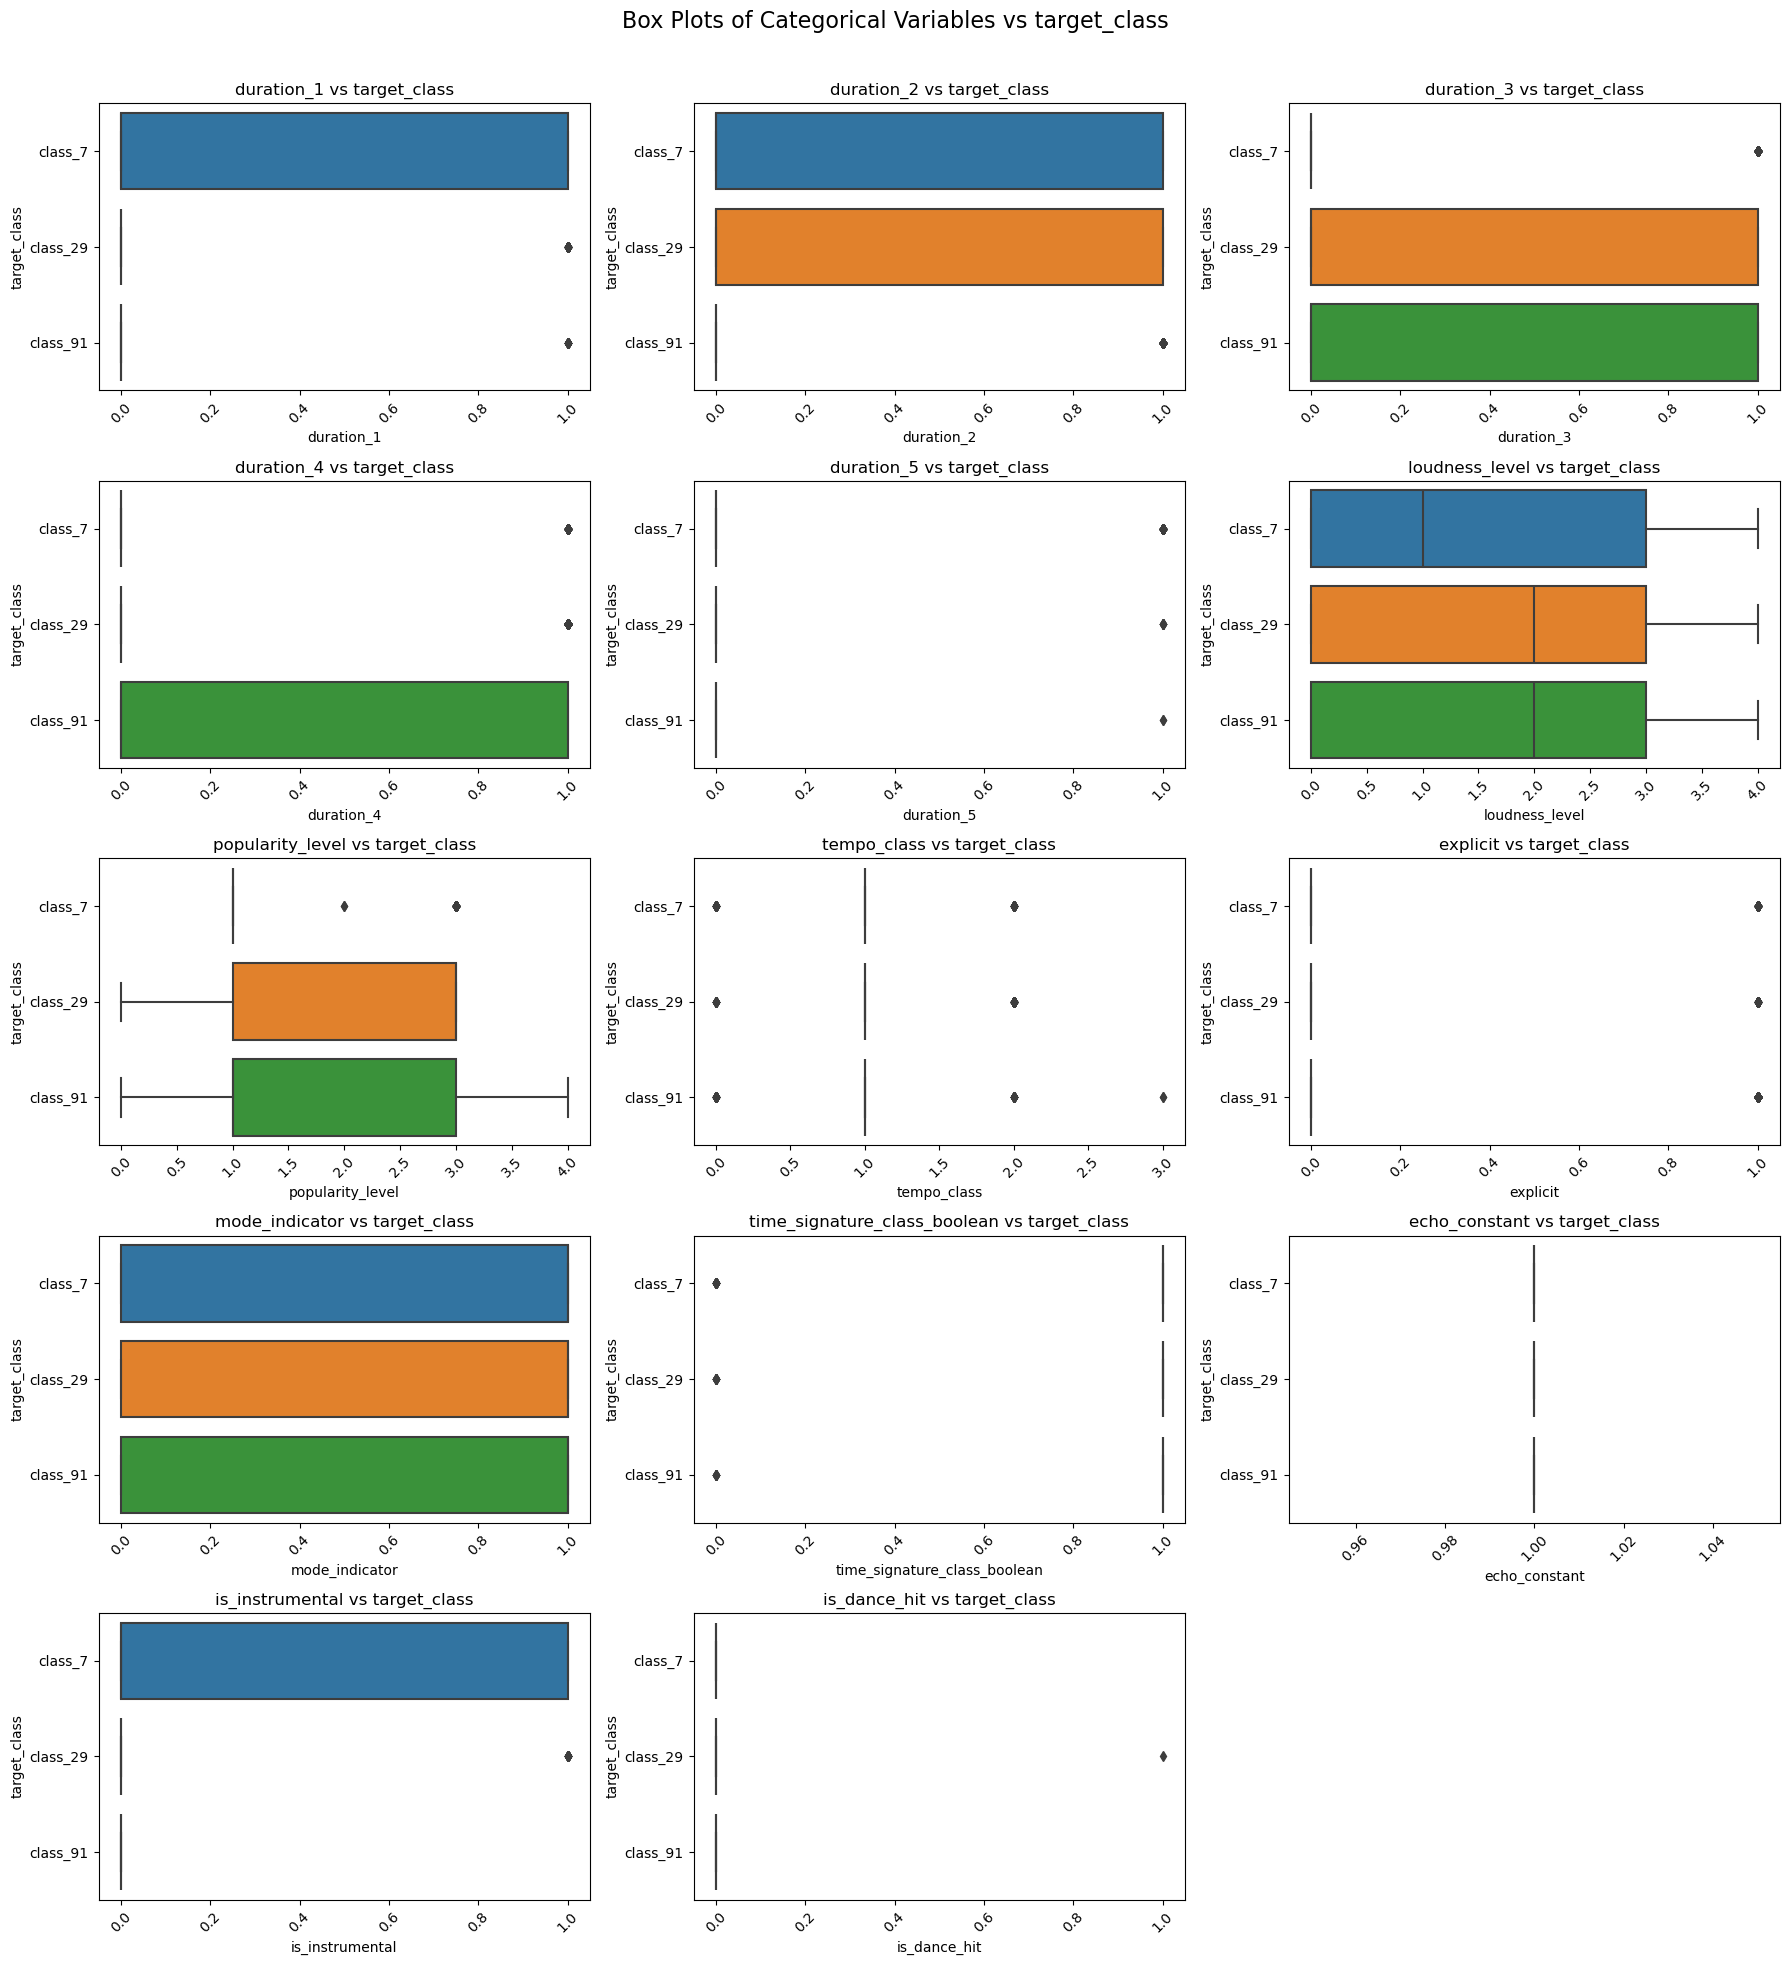

In [342]:
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Box Plots of Categorical Variables vs {categorica_target}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y=categorica_target, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {categorica_target}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Após analise de distribuições, correlações, etc etc aplicamos


In [343]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 4. Encontrar colunas com correlação acima do limiar 
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features removidas por alta correlação ({len(to_drop)}):")
print(to_drop)



Features removidas por alta correlação (8):
['happy_dance', 'tempo_vs_genre', 'mood_pca', 'signal_strength', 'duration_log_z', 'loudness_yeo', 'temp_zscore', 'signal_power']


In [344]:
# remover colunas correlacionadas

dfn_reduced = df[numeric_columns].drop(columns=to_drop)
#dfn_reduced = df[numeric_columns]#.drop(columns=to_drop)
# atualizar a lista de colunas numéricas
numeric_columns = [c for c in numeric_columns if c not in to_drop]

In [345]:
#remover echo constant das categóricas por ser constante
dfc_reduced = df[categorical_columns].drop(columns=['echo_constant'])

In [346]:
#juntar as categoricas as numericas
df_all = pd.concat([dfn_reduced, dfc_reduced], axis=1)
features_all = df_all.columns.tolist()
print(df_all)

      time_signature  key_mode  artist_song_count  album_freq  movement_index  \
0           0.221824 -0.949100           0.386456   -0.301858       -0.799810   
1          -2.089669  1.020640          -0.431042   -0.429684       -1.825498   
2           0.221824  0.204605           0.170060   -0.387075       -0.569318   
3           0.221824 -0.076786          -0.527218   -0.472292       -2.436301   
4          -2.089669 -1.511882           0.386456   -0.387075       -0.603892   
...              ...       ...                ...         ...             ...   
2995        0.221824 -0.358178          -0.575306   -0.514901        1.395623   
2996        0.221824  1.583423          -0.575306   -0.514901        1.044124   
2997        0.221824 -1.483743          -0.551262   -0.472292       -0.073761   
2998        0.221824  0.457857          -0.527218   -0.472292        0.104870   
2999       -2.089669 -0.920961           3.464097   -0.387075       -0.984203   

      intensity_level  verb

# 3 Methods Application - Regression


Simple Linear Regression

In [347]:
results = []

for col in features_all:
    X = df_all[[col]]  # variável independente (1 coluna)
    y = df['target_regression']  # variável dependente

    # dividir treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # criar e treinar modelo linear simples
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # previsões
    y_pred = lr.predict(X_test)

    # métricas
    slope = lr.coef_[0]  # coeficiente angular
    intercept = lr.intercept_  # intercepto
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # guardar resultados
    results.append((col, r2,slope, intercept, mae, mse))

# criar DataFrame ordenado
slr_results = pd.DataFrame(
    results,
    columns=['Feature',  'R2', 'Slope', 'Intercept', 'MAE', 'MSE']
).sort_values(by='R2', ascending=False)

print(slr_results)

                          Feature        R2       Slope  Intercept       MAE  \
12         artists_avg_popularity  0.813562    0.829794   0.023973  0.190340   
31               popularity_level  0.483737    0.679458  -1.374511  0.454850   
3                      album_freq  0.277691   -0.330261  -0.046919  0.693089   
2               artist_song_count  0.047146   -0.255324  -0.221472  0.808535   
10             loudness_intensity  0.017988    0.131710  -0.187923  0.812958   
17                   focus_factor  0.013687   -0.335967  -0.129973  0.815403   
36                is_instrumental  0.007839   -0.282130  -0.159811  0.825922   
8                positivity_index  0.004233   -0.062348  -0.204529  0.840784   
13                energy_rank_pct  0.004172   -0.177508  -0.096551  0.820289   
0                  time_signature  0.003997    0.065953  -0.193017  0.832842   
27                     duration_3  0.002799    0.083147  -0.217005  0.835355   
21                   duration_log  0.002

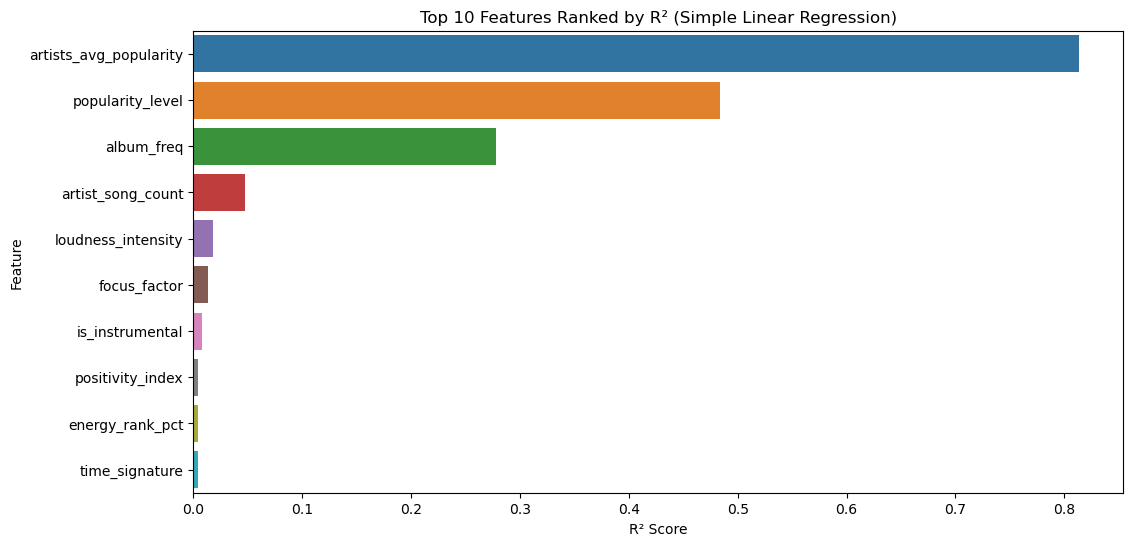

In [348]:
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Feature', data=slr_results.head(10))  # Plot top 10
plt.title('Top 10 Features Ranked by R² (Simple Linear Regression)')
plt.xlabel('R² Score')
plt.ylabel('Feature')
plt.show()


Top 5 features por R²:
                   Feature        R2     Slope  Intercept       MAE       MSE
12  artists_avg_popularity  0.813562  0.829794   0.023973  0.190340  0.182667
31        popularity_level  0.483737  0.679458  -1.374511  0.454850  0.505821
3               album_freq  0.277691 -0.330261  -0.046919  0.693089  0.707699
2        artist_song_count  0.047146 -0.255324  -0.221472  0.808535  0.933581
10      loudness_intensity  0.017988  0.131710  -0.187923  0.812958  0.962149

Melhor feature: artists_avg_popularity


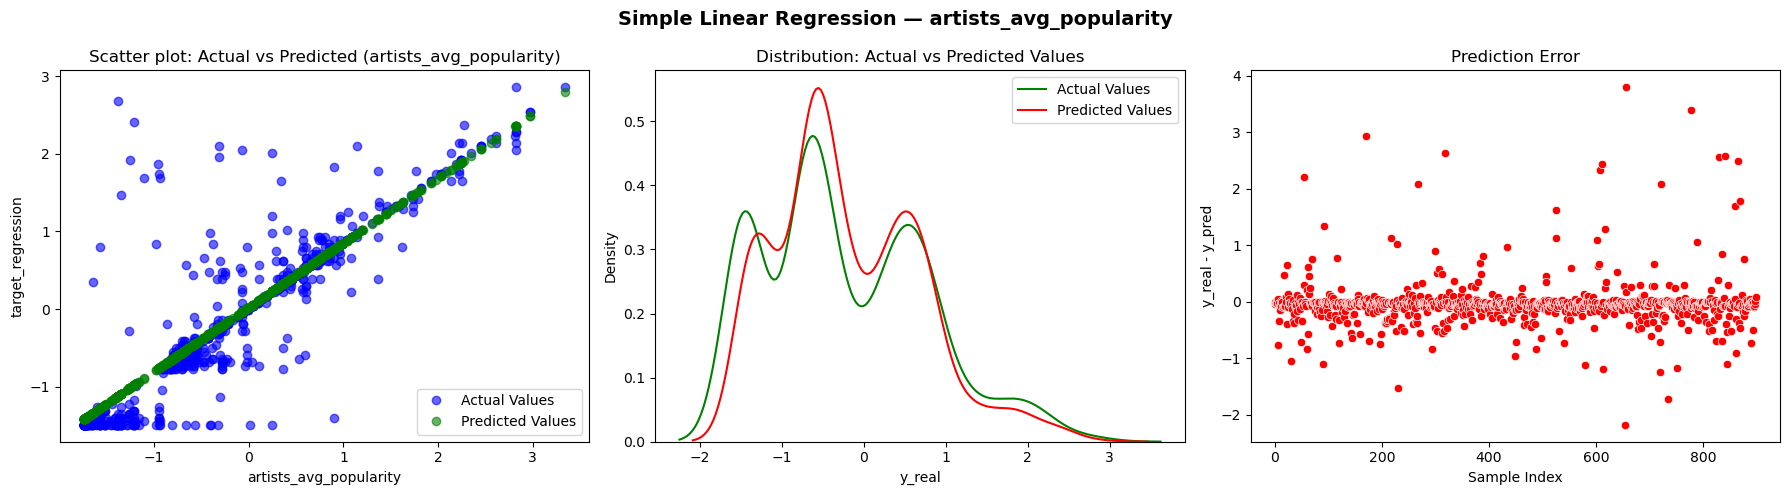

In [349]:
slr_results = pd.DataFrame(
    results,
    columns=['Feature', 'R2', 'Slope', 'Intercept', 'MAE', 'MSE']
).sort_values(by='R2', ascending=False)

print("\nTop 5 features por R²:")
print(slr_results.head(5))

# --- escolher a melhor feature ---
best_feature = slr_results.iloc[0]['Feature']
print(f"\nMelhor feature: {best_feature}")

# --- reconstruir dados dessa feature para visualização ---
X = df_all[[best_feature]]
y = df['target_regression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Erro individual
slr_error = y_test - y_pred

# DataFrame auxiliar
df_plot = pd.DataFrame({
    best_feature: X_test[best_feature],
    'y_real': y_test,
    'y_pred': y_pred,
    'slr_error': slr_error
}).reset_index(drop=True)

# --- visualizações ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: reais vs previstos
axes[0].plot(df_plot[best_feature], df_plot['y_real'], 'bo', label='Actual Values', alpha=0.6)
axes[0].plot(df_plot[best_feature], df_plot['y_pred'], 'go', label='Predicted Values', alpha=0.6)
axes[0].set_title(f"Scatter plot: Actual vs Predicted ({best_feature})")
axes[0].set_xlabel(best_feature)
axes[0].set_ylabel("target_regression")
axes[0].legend()

# Distribuição (KDE) — reais vs previstos
sns.kdeplot(df_plot['y_real'], color="g", label="Actual Values", ax=axes[1])
sns.kdeplot(df_plot['y_pred'], color="r", label="Predicted Values", ax=axes[1])
axes[1].set_title("Distribution: Actual vs Predicted Values")
axes[1].legend()

# Erro de previsão
sns.scatterplot(x=df_plot.index, y='slr_error', data=df_plot, color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_xlabel("Sample Index")
axes[2].set_ylabel("y_real - y_pred")

fig.suptitle(f"Simple Linear Regression — {best_feature}", fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

Multiple linear regression


In [350]:
# X = df_all
# y = df['target_regression']
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.4, random_state=42
# )

In [351]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [352]:
feature_groups = {
    'Top 5':  slr_results.head(5)['Feature'].tolist(),
    'Top 10': slr_results.head(10)['Feature'].tolist(),
    'Top 15': slr_results.head(15)['Feature'].tolist()
}

# Loop pelos grupos e avaliar o modelo MLR
results_all = []

for group_name, features in feature_groups.items():
    X = df_all[features]
    y = df['target_regression']

    # Divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # Escalonamento
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Modelo MLR
    mlr = LinearRegression()
    mlr.fit(X_train_scaled, y_train)

    # Previsões
    y_pred_train = mlr.predict(X_train_scaled)
    y_pred_test = mlr.predict(X_test_scaled)

    # Métricas
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Guardar resultados
    results_all.append([
        group_name, len(features),
        r2_train, r2_test, mae, rmse
    ])

# DataFrame de resultados
df_results_all = pd.DataFrame(results_all, columns=[
    'Feature Group', 'Num Features',
    'R2 Train', 'R2 Test', 'MAE', 'RMSE'
])

print("\n=== Resultados — Multiple Linear Regression ===")
print(df_results_all)

# Identificar o melhor grupo (maior R² de teste)
best_group_row = df_results_all.loc[df_results_all['R2 Test'].idxmax()]
best_group = best_group_row['Feature Group']
print(f"\n🏆 Melhor grupo de features: {best_group}")
print(best_group_row)

# Gráfico Real vs Previsto (para o melhor grupo)
features_best = feature_groups[best_group]
X = df_all[features_best]
y = df['target_regression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar modelo final
mlr = LinearRegression().fit(X_train_scaled, y_train)
y_pred_test = mlr.predict(X_test_scaled)


=== Resultados — Multiple Linear Regression ===
  Feature Group  Num Features  R2 Train   R2 Test       MAE      RMSE
0         Top 5             5  0.802808  0.835138  0.242215  0.400189
1        Top 10            10  0.809338  0.840226  0.239712  0.393964
2        Top 15            15  0.809877  0.839397  0.240338  0.394985

🏆 Melhor grupo de features: Top 10
Feature Group      Top 10
Num Features           10
R2 Train         0.809338
R2 Test          0.840226
MAE              0.239712
RMSE             0.393964
Name: 1, dtype: object


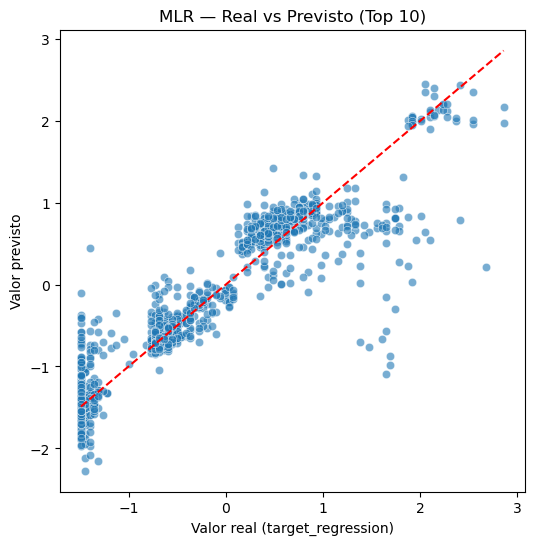

In [353]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valor real (target_regression)")
plt.ylabel("Valor previsto")
plt.title(f"MLR — Real vs Previsto ({best_group})")
plt.show()

# 4 Methods Application - Classification

In [354]:
X = df_all
y_class = df['target_class']          # variável categórica
y_reg = df['target_regression']       # variável contínua (para ElasticNet)

# Dataset de classificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.4, random_state=42, stratify=y_class
)

# Dataset de regressão (para seleção de features)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.4, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)



In [355]:
def describe_scores(name, scores):
    desc = {
        'mean': np.mean(scores),
        'std': np.std(scores),
        'min': np.min(scores),
        'max': np.max(scores),
        'median': np.median(scores),
        'q25': np.percentile(scores, 25),
        'q75': np.percentile(scores, 75),
        'iqr': np.percentile(scores, 75) - np.percentile(scores, 25),
    }
    print(f"\n{name} results:")
    for k, v in desc.items():
        print(f"  {k:>7}: {v:.4f}")
    return desc

Logistic regression


In [356]:
logr = LogisticRegression(max_iter=1000, random_state=42)
logr.fit(X_train, y_train)

# Predictions
y_pred_train = logr.predict(X_train_scaled)
y_pred_test = logr.predict(X_test_scaled)

print("=== Logistic Regression Performance ===")
print(f"Accuracy (Train): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy (Test):  {accuracy_score(y_test, y_pred_test):.4f}")

print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, y_pred_test))

print("\n--- Confusion Matrix (Test) ---")
print(confusion_matrix(y_test, y_pred_test))

variances = X_train_scaled.var(axis=0)
low_var_features = np.array(X.columns)[variances < 0.01]
print("Features com baixa variância:", low_var_features)


# --- 1) K-Fold (k=5)
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(logr, X_train_scaled, y_train, cv=cv5, scoring='accuracy')
desc_5 = describe_scores("Cross Validation (k=5)", scores_5)

# --- 2) K-Fold (k=10)
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(logr, X_train_scaled, y_train, cv=cv10, scoring='accuracy')
desc_10 = describe_scores("Cross Validation (k=10)", scores_10)

# --- 3) Leave-One-Out
loo = LeaveOneOut()
scores_loo = cross_val_score(logr, X_train_scaled, y_train, cv=loo, scoring='accuracy')
desc_loo = describe_scores("Leave-One-Out (LOOCV)", scores_loo)

# --- 4) Bootstrap
n_iterations = 100
scores_boot = []
for i in range(n_iterations):
    X_res, y_res = resample(X_train_scaled, y_train, replace=True, random_state=42+i)
    logr.fit(X_res, y_res)
    y_pred = logr.predict(X_test_scaled)
    scores_boot.append(accuracy_score(y_test, y_pred))

scores_boot = np.array(scores_boot)
desc_boot = describe_scores("Bootstrap (100 samples)", scores_boot)

=== Logistic Regression Performance ===
Accuracy (Train): 0.8367
Accuracy (Test):  0.8308

--- Classification Report (Test) ---
              precision    recall  f1-score   support

    class_29       0.84      0.65      0.73       400
     class_7       0.93      0.91      0.92       400
    class_91       0.75      0.93      0.83       400

    accuracy                           0.83      1200
   macro avg       0.84      0.83      0.83      1200
weighted avg       0.84      0.83      0.83      1200


--- Confusion Matrix (Test) ---
[[259  26 115]
 [ 24 365  11]
 [ 27   0 373]]
Features com baixa variância: []

Cross Validation (k=5) results:
     mean: 0.8911
      std: 0.0146
      min: 0.8694
      max: 0.9111
   median: 0.8889
      q25: 0.8833
      q75: 0.9028
      iqr: 0.0194

Cross Validation (k=10) results:
     mean: 0.8933
      std: 0.0212
      min: 0.8611
      max: 0.9333
   median: 0.8917
      q25: 0.8778
      q75: 0.9083
      iqr: 0.0306

Leave-One-Out (LOOCV) r

## 5 logistic Regression — com Feature Selection (ElasticNet)

Nesta secção aplicamos a Regressão Logística após seleção de features com **ElasticNetCV**, 
que combina penalizações L1 (Lasso) e L2 (Ridge).

O objetivo é:
- Reduzir a dimensionalidade do dataset (`X`)
- Identificar e remover features pouco relevantes
- Avaliar se o desempenho da classificação melhora após a seleção.

### Seleção de Features com ElasticNetCV

Utilizamos o `target_regression` como variável contínua auxiliar para o processo de regularização, 
permitindo ao `ElasticNetCV` identificar as features menos relevantes (coeficiente ≈ 0).


In [357]:
print("=== FEATURE SELECTION (ElasticNet baseado em target_regression) ===")

# ElasticNetCV para seleção de features
y_reg = df['target_regression']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.4, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

elastic = ElasticNetCV(
    alphas=np.logspace(-3, 3, 50),
    l1_ratio=np.linspace(0.1, 0.9, 5),
    cv=5,
    random_state=42
)
elastic.fit(X_train_reg_scaled, y_train_reg)

coef = elastic.coef_

selected_features = X.columns[np.abs(coef) > 1e-6].tolist()
removed_features = X.columns[np.abs(coef) <= 1e-6].tolist()

print(f"Features removidas ({len(removed_features)} de {X.shape[1]}): {removed_features}")
print(f"\nFeatures mantidas ({len(selected_features)} de {X.shape[1]}): {selected_features}")

=== FEATURE SELECTION (ElasticNet baseado em target_regression) ===
Features removidas (2 de 38): ['purity_score', 'duration_3']

Features mantidas (36 de 38): ['time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index', 'intensity_level', 'verbal_density', 'positivity_index', 'activity_rate', 'loudness_intensity', 'acoustics_instrumental', 'artists_avg_popularity', 'energy_rank_pct', 'loud_energy_ratio', 'mood_cluster', 'acoustic_valence_mood_cluster', 'focus_factor', 'ambient_level', 'key_sin', 'key_cos', 'duration_log', 'resonance_factor', 'timbre_index', 'distorted_movement', 'duration_1', 'duration_2', 'duration_4', 'duration_5', 'loudness_level', 'popularity_level', 'tempo_class', 'explicit', 'mode_indicator', 'time_signature_class_boolean', 'is_instrumental', 'is_dance_hit']


### Treino da Regressão Logística com as features selecionadas

Após remover as features de baixo peso, voltamos a treinar o modelo de Regressão Logística.

In [358]:
# Criar datasets reduzidos
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

# Treinar modelo com features selecionadas
logr_fs = LogisticRegression(max_iter=1000, random_state=42)
logr_fs.fit(X_train_sel_scaled, y_train)

# Previsões
y_pred_train_fs = logr_fs.predict(X_train_sel_scaled)
y_pred_test_fs = logr_fs.predict(X_test_sel_scaled)

### Validação cruzada e comparação com o modelo sem seleção

Avaliamos o desempenho do modelo com **k-fold (5 e 10)**, **LOOCV** e **Bootstrap (100 iterações)**, 
seguindo o mesmo procedimento da Regressão Logística base.  
Por fim, comparamos ambos os modelos.


=== Holdout (Test set) — Feature Selection ===
Accuracy (Train): 0.9089
Accuracy (Test):  0.9008

Classification Report:
               precision    recall  f1-score   support

    class_29       0.84      0.86      0.85       400
     class_7       0.95      0.96      0.96       400
    class_91       0.91      0.88      0.89       400

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200


--- Confusion Matrix (Test) ---


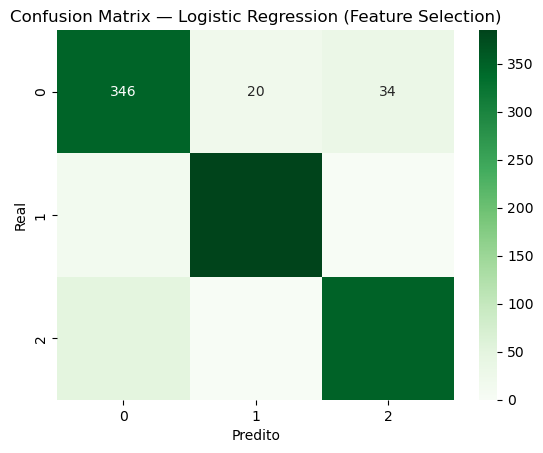


Cross Validation (k=5) — Feature Selection results:
     mean: 0.8911
      std: 0.0147
      min: 0.8750
      max: 0.9167
   median: 0.8861
      q25: 0.8806
      q75: 0.8972
      iqr: 0.0167

Cross Validation (k=10) — Feature Selection results:
     mean: 0.8889
      std: 0.0211
      min: 0.8667
      max: 0.9333
   median: 0.8833
      q25: 0.8722
      q75: 0.9028
      iqr: 0.0306

Leave-One-Out (LOOCV) — Feature Selection results:
     mean: 0.8911
      std: 0.3115
      min: 0.0000
      max: 1.0000
   median: 1.0000
      q25: 1.0000
      q75: 1.0000
      iqr: 0.0000

Bootstrap (100 samples) — Feature Selection results:
     mean: 0.8878
      std: 0.0065
      min: 0.8675
      max: 0.9050
   median: 0.8875
      q25: 0.8842
      q75: 0.8919
      iqr: 0.0077


{'mean': 0.8877666666666667,
 'std': 0.006454843142943132,
 'min': 0.8675,
 'max': 0.905,
 'median': 0.8875,
 'q25': 0.8841666666666667,
 'q75': 0.891875,
 'iqr': 0.007708333333333317}

In [359]:
# --- Holdout ---
print("\n=== Holdout (Test set) — Feature Selection ===")
acc_train_fs = accuracy_score(y_train, y_pred_train_fs)
acc_test_fs = accuracy_score(y_test, y_pred_test_fs)
print(f"Accuracy (Train): {acc_train_fs:.4f}")
print(f"Accuracy (Test):  {acc_test_fs:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_fs, zero_division=0))
print("\n--- Confusion Matrix (Test) ---")
sns.heatmap(confusion_matrix(y_test, y_pred_test_fs), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix — Logistic Regression (Feature Selection)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Cross-validation
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5_fs = cross_val_score(logr_fs, X_train_sel_scaled, y_train, cv=cv5, scoring='accuracy')
desc_5_fs = describe_scores("Cross Validation (k=5) — Feature Selection", scores_5_fs)

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10_fs = cross_val_score(logr_fs, X_train_sel_scaled, y_train, cv=cv10, scoring='accuracy')
desc_10_fs = describe_scores("Cross Validation (k=10) — Feature Selection", scores_10_fs)

# --- 3) Leave-One-Out
loo = LeaveOneOut()
scores_loo_fs = cross_val_score(logr_fs, X_train_sel_scaled, y_train, cv=loo, scoring='accuracy')
desc_loo_fs = describe_scores("Leave-One-Out (LOOCV) — Feature Selection", scores_loo_fs)

# Bootstrap
scores_boot_fs = []
for i in range(100):
    X_res, y_res = resample(X_train_sel_scaled, y_train, replace=True, random_state=42+i)
    logr_fs.fit(X_res, y_res)
    y_pred = logr_fs.predict(X_test_sel_scaled)
    scores_boot_fs.append(accuracy_score(y_test, y_pred))
describe_scores("Bootstrap (100 samples) — Feature Selection", np.array(scores_boot_fs))

In [360]:

# Holdout
acc_holdout_before = accuracy_score(y_test, y_pred_test)
acc_holdout_after = accuracy_score(y_test, y_pred_test_fs)

# Cross-validation
acc_cv5_before = np.mean(scores_5)
acc_cv5_after = np.mean(scores_5_fs)
acc_cv10_before = np.mean(scores_10)
acc_cv10_after = np.mean(scores_10_fs)

# LOOCV
acc_loo_before = np.mean(scores_loo)
acc_loo_after = np.mean(scores_loo_fs)

# Bootstrap
acc_boot_before = np.mean(scores_boot)
acc_boot_after = np.mean(scores_boot_fs)

# Criação do DataFrame comparativo
comparison_all = pd.DataFrame({
    'Método': ['Holdout', 'K-Fold (5)', 'K-Fold (10)', 'LOOCV', 'Bootstrap'],
    'Accuracy — Sem FS': [acc_holdout_before, acc_cv5_before, acc_cv10_before, acc_loo_before, acc_boot_before],
    'Accuracy — Com FS': [acc_holdout_after, acc_cv5_after, acc_cv10_after, acc_loo_after, acc_boot_after],
})

# Cálculo da diferença percentual
comparison_all['Δ (Melhoria %)'] = (
    (comparison_all['Accuracy — Com FS'] - comparison_all['Accuracy — Sem FS'])
    / comparison_all['Accuracy — Sem FS'] * 100
).round(2)

display(comparison_all.style
        .set_caption("Comparação completa — Logistic Regression (sem vs com Feature Selection)")
        .background_gradient(subset=['Δ (Melhoria %)'], cmap='Greens'))

LDA


In [362]:
Xc = df_all
yc = df['target_class']

Xc_s = scaler.fit_transform(Xc)

# --- Holdout ---
X_tr, X_te, y_tr, y_te = train_test_split(Xc, yc, test_size=0.2, random_state=42, stratify=yc)
print("Train shape:", X_tr.shape, "| Test shape:", X_te.shape, "| Classes:", np.unique(yc))

lda = LinearDiscriminantAnalysis()

# === Holdout ===
lda.fit(X_tr, y_tr)
y_pred = lda.predict(X_te)
print("\n=== LDA (Holdout) ===")
print("Accuracy:", accuracy_score(y_te, y_pred))
print("F1 (macro):", f1_score(y_te, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))
print("Classification Report:\n", classification_report(y_te, y_pred, zero_division=0))

# === Cross Validation (k=5 e k=10) ===
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(lda, Xc_s, yc, cv=cv5, scoring='accuracy')
describe_scores("Cross Validation (k=5)", scores_5)

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(lda, Xc_s, yc, cv=cv10, scoring='accuracy')
describe_scores("Cross Validation (k=10)", scores_10)

# === Leave-One-Out ===
loo = LeaveOneOut()
scores_loo = cross_val_score(lda, Xc_s, yc, cv=loo, scoring='accuracy')
describe_scores("Leave-One-Out (LOOCV)", scores_loo)

# === Bootstrap ===
n_iterations = 100
scores_boot = []
for i in range(n_iterations):
    X_res, y_res = resample(Xc_s, yc, replace=True, random_state=42+i)
    lda.fit(X_res, y_res)
    y_pred = lda.predict(X_te)
    scores_boot.append(accuracy_score(y_te, y_pred))
describe_scores("Bootstrap (100 samples)", np.array(scores_boot))

Train shape: (2400, 38) | Test shape: (600, 38) | Classes: ['class_29' 'class_7' 'class_91']

=== LDA (Holdout) ===
Accuracy: 0.8983333333333333
F1 (macro): 0.8985647593339063
Confusion Matrix:
 [[175  10  15]
 [  8 192   0]
 [ 28   0 172]]
Classification Report:
               precision    recall  f1-score   support

    class_29       0.83      0.88      0.85       200
     class_7       0.95      0.96      0.96       200
    class_91       0.92      0.86      0.89       200

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600


Cross Validation (k=5) results:
     mean: 0.8853
      std: 0.0051
      min: 0.8800
      max: 0.8950
   median: 0.8833
      q25: 0.8833
      q75: 0.8850
      iqr: 0.0017

Cross Validation (k=10) results:
     mean: 0.8837
      std: 0.0181
      min: 0.8600
      max: 0.9100
   median: 0.8800
      q25: 0.8683
      q75: 0.9025
      iqr: 0.0342

{'mean': 0.6523666666666665,
 'std': 0.2484506635576211,
 'min': 0.3333333333333333,
 'max': 0.88,
 'median': 0.8408333333333333,
 'q25': 0.3333333333333333,
 'q75': 0.8566666666666667,
 'iqr': 0.5233333333333334}

### LDA com Feature Selection (ElasticNet)

Nesta secção, aplicamos **Linear Discriminant Analysis (LDA)** apenas às *features selecionadas* pelo modelo
**ElasticNet**.  
O objetivo é verificar se o desempenho do LDA melhora quando usamos apenas as variáveis mais relevantes
identificadas pelo método de regularização.


=== LDA (COM Feature Selection) ===
Accuracy (Train): 0.8872
Accuracy (Test):  0.8900

--- Classification Report (Test) ---
              precision    recall  f1-score   support

    class_29       0.81      0.88      0.84       400
     class_7       0.96      0.94      0.95       400
    class_91       0.91      0.85      0.88       400

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



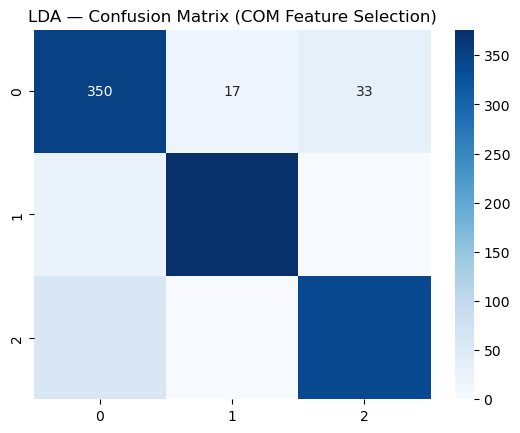

In [363]:
# Subconjunto apenas com as features selecionadas
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

# Escalonamento
scaler_fs = StandardScaler()
X_train_fs_scaled = scaler_fs.fit_transform(X_train_fs)
X_test_fs_scaled = scaler_fs.transform(X_test_fs)

lda_fs = LinearDiscriminantAnalysis()
lda_fs.fit(X_train_fs_scaled, y_train)
y_pred_test_fs = lda_fs.predict(X_test_fs_scaled)

print("\n=== LDA (COM Feature Selection) ===")
print(f"Accuracy (Train): {accuracy_score(y_train, lda_fs.predict(X_train_fs_scaled)):.4f}")
print(f"Accuracy (Test):  {accuracy_score(y_test, y_pred_test_fs):.4f}")
print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, y_pred_test_fs, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_test_fs), annot=True, fmt='d', cmap='Blues')
plt.title("LDA — Confusion Matrix (COM Feature Selection)")
plt.show()

### Cross-Validation, LOOCV e Bootstrap

Após a avaliação Holdout, aplicamos diferentes técnicas de reamostragem (Cross Validation, Leave-One-Out e Bootstrap)
para analisar o impacto da variação dos dados no desempenho do modelo LDA com Feature Selection.

In [364]:
# === CROSS VALIDATION (k=5 e k=10) ===
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(lda, X_train_scaled, y_train, cv=cv5, scoring='accuracy')
scores_5_fs = cross_val_score(lda_fs, X_train_fs_scaled, y_train, cv=cv5, scoring='accuracy')

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(lda, X_train_scaled, y_train, cv=cv10, scoring='accuracy')
scores_10_fs = cross_val_score(lda_fs, X_train_fs_scaled, y_train, cv=cv10, scoring='accuracy')

# === LEAVE ONE OUT ===
loo = LeaveOneOut()
scores_loo = cross_val_score(lda, X_train_scaled, y_train, cv=loo, scoring='accuracy')
scores_loo_fs = cross_val_score(lda_fs, X_train_fs_scaled, y_train, cv=loo, scoring='accuracy')

# === BOOTSTRAP ===
n_iterations = 100
scores_boot, scores_boot_fs = [], []
for i in range(n_iterations):
    X_res, y_res = resample(X_train_scaled, y_train, replace=True, random_state=42+i)
    X_res_fs, y_res_fs = resample(X_train_fs_scaled, y_train, replace=True, random_state=42+i)
    
    lda.fit(X_res, y_res)
    lda_fs.fit(X_res_fs, y_res_fs)
    
    y_pred_bs = lda.predict(X_test_scaled)
    y_pred_bs_fs = lda_fs.predict(X_test_fs_scaled)
    
    scores_boot.append(accuracy_score(y_test, y_pred_bs))
    scores_boot_fs.append(accuracy_score(y_test, y_pred_bs_fs))

In [365]:
# Holdout
acc_holdout_before = accuracy_score(y_test, y_pred_test)
acc_holdout_after = accuracy_score(y_test, y_pred_test_fs)

# Cross-validation
acc_cv5_before = np.mean(scores_5)
acc_cv5_after = np.mean(scores_5_fs)
acc_cv10_before = np.mean(scores_10)
acc_cv10_after = np.mean(scores_10_fs)

# LOOCV
acc_loo_before = np.mean(scores_loo)
acc_loo_after = np.mean(scores_loo_fs)

# Bootstrap
acc_boot_before = np.mean(scores_boot)
acc_boot_after = np.mean(scores_boot_fs)

# DataFrame comparativo
comparison_lda = pd.DataFrame({
    'Método': ['Holdout', 'K-Fold (5)', 'K-Fold (10)', 'LOOCV', 'Bootstrap'],
    'Accuracy — Sem FS': [acc_holdout_before, acc_cv5_before, acc_cv10_before, acc_loo_before, acc_boot_before],
    'Accuracy — Com FS': [acc_holdout_after, acc_cv5_after, acc_cv10_after, acc_loo_after, acc_boot_after],
})

comparison_lda['Δ (Melhoria %)'] = (
    (comparison_lda['Accuracy — Com FS'] - comparison_lda['Accuracy — Sem FS'])
    / comparison_lda['Accuracy — Sem FS'] * 100
).round(2)

display(
    comparison_lda.style
        .set_caption("Comparação completa — LDA (Sem vs Com Feature Selection - ElasticNet)")
        .background_gradient(subset=['Δ (Melhoria %)'], cmap='Greens')
)

QDA

In [367]:
# --- Dados ---
Xc = df_all
yc = df['target_class']

# --- Holdout ---
X_tr, X_te, y_tr, y_te = train_test_split(Xc, yc, test_size=0.2, random_state=42, stratify=yc)
print("Train shape:", X_tr.shape, "| Test shape:", X_te.shape, "| Classes:", np.unique(yc))

qda = QuadraticDiscriminantAnalysis()

# === Holdout ===
qda.fit(X_tr, y_tr)
y_pred = qda.predict(X_te)
print("\n=== QDA (Holdout) ===")
print("Accuracy:", accuracy_score(y_te, y_pred))
print("F1 (macro):", f1_score(y_te, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))
print("Classification Report:\n", classification_report(y_te, y_pred, zero_division=0))

# === Cross Validation (k=5 e k=10) ===
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(qda, Xc, yc, cv=cv5, scoring='accuracy')
describe_scores("Cross Validation (k=5)", scores_5)

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(qda, Xc, yc, cv=cv10, scoring='accuracy')
describe_scores("Cross Validation (k=10)", scores_10)

# === Leave-One-Out ===
loo = LeaveOneOut()
scores_loo = cross_val_score(qda, Xc, yc, cv=loo, scoring='accuracy')
describe_scores("Leave-One-Out (LOOCV)", scores_loo)

# === Bootstrap ===
n_iterations = 100
scores_boot = []
for i in range(n_iterations):
    X_res, y_res = resample(Xc, yc, replace=True, random_state=42+i)
    qda.fit(X_res, y_res)
    y_pred = qda.predict(X_te)
    scores_boot.append(accuracy_score(y_te, y_pred))
describe_scores("Bootstrap (100 samples)", np.array(scores_boot))

Train shape: (2400, 38) | Test shape: (600, 38) | Classes: ['class_29' 'class_7' 'class_91']

=== QDA (Holdout) ===
Accuracy: 0.6166666666666667
F1 (macro): 0.5406472106679182
Confusion Matrix:
 [[ 17  87  96]
 [  0 193   7]
 [ 35   5 160]]
Classification Report:
               precision    recall  f1-score   support

    class_29       0.33      0.09      0.13       200
     class_7       0.68      0.96      0.80       200
    class_91       0.61      0.80      0.69       200

    accuracy                           0.62       600
   macro avg       0.54      0.62      0.54       600
weighted avg       0.54      0.62      0.54       600


Cross Validation (k=5) results:
     mean: 0.6183
      std: 0.0132
      min: 0.6017
      max: 0.6367
   median: 0.6217
      q25: 0.6050
      q75: 0.6267
      iqr: 0.0217

Cross Validation (k=10) results:
     mean: 0.6153
      std: 0.0287
      min: 0.5700
      max: 0.6467
   median: 0.6167
      q25: 0.5933
      q75: 0.6450
      iqr: 0.0517

{'mean': 0.6694833333333334,
 'std': 0.033857294470894875,
 'min': 0.6116666666666667,
 'max': 0.825,
 'median': 0.66,
 'q25': 0.65125,
 'q75': 0.69,
 'iqr': 0.03874999999999995}

## QDA — Com Feature Selection (ElasticNet)

Nesta etapa, o modelo QDA é treinado e avaliado **apenas com as variáveis selecionadas**
pelo **ElasticNet**, método de regularização que combina penalizações *L1* e *L2*.

O objetivo é verificar se a redução do número de variáveis resulta em melhor desempenho
ou menor variabilidade nos resultados.


=== QDA (COM Feature Selection) ===
Accuracy (Train): 0.6050
Accuracy (Test):  0.6200

--- Classification Report (Test) ---
              precision    recall  f1-score   support

    class_29       1.00      0.01      0.03       400
     class_7       0.80      0.85      0.83       400
    class_91       0.52      0.99      0.68       400

    accuracy                           0.62      1200
   macro avg       0.77      0.62      0.51      1200
weighted avg       0.77      0.62      0.51      1200



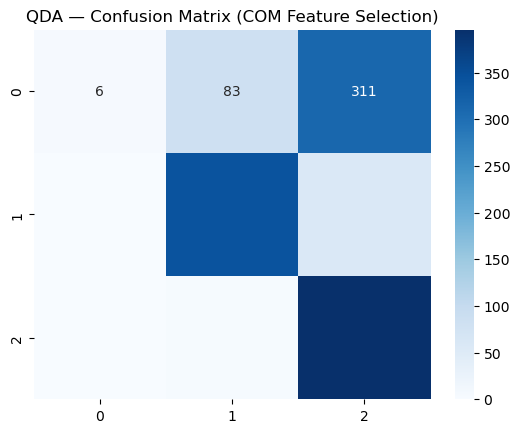

In [368]:
X_train_fs = X_train[selected_features]
X_test_fs = X_test[selected_features]

# Escalonamento
scaler_fs = StandardScaler()
X_train_fs_scaled = scaler_fs.fit_transform(X_train_fs)
X_test_fs_scaled = scaler_fs.transform(X_test_fs)

qda_fs = QuadraticDiscriminantAnalysis()
qda_fs.fit(X_train_fs_scaled, y_train)
y_pred_test_fs = qda_fs.predict(X_test_fs_scaled)

print("\n=== QDA (COM Feature Selection) ===")
print(f"Accuracy (Train): {accuracy_score(y_train, qda_fs.predict(X_train_fs_scaled)):.4f}")
print(f"Accuracy (Test):  {accuracy_score(y_test, y_pred_test_fs):.4f}")
print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, y_pred_test_fs, zero_division=0))

sns.heatmap(confusion_matrix(y_test, y_pred_test_fs), annot=True, fmt='d', cmap='Blues')
plt.title("QDA — Confusion Matrix (COM Feature Selection)")
plt.show()

### Reamostragem — QDA (Sem e Com Feature Selection)

Nesta secção, comparamos o QDA original e o QDA com FS através de diferentes métodos
de reamostragem:

- **K-Fold (k=5 e k=10)**
- **Leave-One-Out (LOOCV)**
- **Bootstrap (100 iterações)**

Isto permite observar como a *Feature Selection* afeta a estabilidade e a variação do modelo.


In [369]:

# === CROSS VALIDATION (k=5 e k=10) ===
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_5 = cross_val_score(qda, X_train_scaled, y_train, cv=cv5, scoring='accuracy')
scores_5_fs = cross_val_score(qda_fs, X_train_fs_scaled, y_train, cv=cv5, scoring='accuracy')

cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores_10 = cross_val_score(qda, X_train_scaled, y_train, cv=cv10, scoring='accuracy')
scores_10_fs = cross_val_score(qda_fs, X_train_fs_scaled, y_train, cv=cv10, scoring='accuracy')

# === LEAVE ONE OUT ===
loo = LeaveOneOut()
scores_loo = cross_val_score(qda, X_train_scaled, y_train, cv=loo, scoring='accuracy')
scores_loo_fs = cross_val_score(qda_fs, X_train_fs_scaled, y_train, cv=loo, scoring='accuracy')

# === BOOTSTRAP ===
n_iterations = 100
scores_boot, scores_boot_fs = [], []
for i in range(n_iterations):
    X_res, y_res = resample(X_train_scaled, y_train, replace=True, random_state=42+i)
    X_res_fs, y_res_fs = resample(X_train_fs_scaled, y_train, replace=True, random_state=42+i)
    
    qda.fit(X_res, y_res)
    qda_fs.fit(X_res_fs, y_res_fs)
    
    y_pred_bs = qda.predict(X_test_scaled)
    y_pred_bs_fs = qda_fs.predict(X_test_fs_scaled)
    
    scores_boot.append(accuracy_score(y_test, y_pred_bs))
    scores_boot_fs.append(accuracy_score(y_test, y_pred_bs_fs))

## Comparação de Resultados — QDA Sem vs Com Feature Selection

A tabela abaixo compara o desempenho do QDA **antes e depois da Feature Selection**,  
permitindo observar o impacto em termos de *accuracy* e *melhoria percentual* para
cada método de avaliação.

In [370]:
# Holdout
acc_holdout_before = accuracy_score(y_test, y_pred_test)
acc_holdout_after = accuracy_score(y_test, y_pred_test_fs)

# Cross-validation
acc_cv5_before = np.mean(scores_5)
acc_cv5_after = np.mean(scores_5_fs)
acc_cv10_before = np.mean(scores_10)
acc_cv10_after = np.mean(scores_10_fs)

# LOOCV
acc_loo_before = np.mean(scores_loo)
acc_loo_after = np.mean(scores_loo_fs)

# Bootstrap
acc_boot_before = np.mean(scores_boot)
acc_boot_after = np.mean(scores_boot_fs)

# DataFrame comparativo
comparison_qda = pd.DataFrame({
    'Método': ['Holdout', 'K-Fold (5)', 'K-Fold (10)', 'LOOCV', 'Bootstrap'],
    'Accuracy — Sem FS': [acc_holdout_before, acc_cv5_before, acc_cv10_before, acc_loo_before, acc_boot_before],
    'Accuracy — Com FS': [acc_holdout_after, acc_cv5_after, acc_cv10_after, acc_loo_after, acc_boot_after],
})

comparison_qda['Δ (Melhoria %)'] = (
    (comparison_qda['Accuracy — Com FS'] - comparison_qda['Accuracy — Sem FS'])
    / comparison_qda['Accuracy — Sem FS'] * 100
).round(2)

display(
    comparison_qda.style
        .set_caption("Comparação completa — QDA (Sem vs Com Feature Selection - ElasticNet)")
        .background_gradient(subset=['Δ (Melhoria %)'], cmap='Greens')
)